In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
df = pd.read_csv('C:\\Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [12]:
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df_clean = df[(z_scores < 3).all(axis=1)]

In [15]:
summary = df_clean.describe().T
summary["IQR"] = summary["75%"] - summary["25%"]
summary[["mean", "50%", "std", "IQR"]]

,mean,50%,std,IQR
LB,1.333035e+02,133.000000,9.899678e+00,15.000000
AC,3.177665e-03,0.001668,3.770350e-03,0.005650
FM,4.239526e-03,0.000000,1.355382e-02,0.002358
UC,4.390969e-03,0.004556,2.904462e-03,0.004577
DL,1.732029e-03,0.000000,2.705466e-03,0.003036
DS,1.186182e-08,0.000000,5.854019e-07,0.000000
DP,1.001085e-04,0.000000,4.044223e-04,0.000000
ASTV,4.687087e+01,48.000000,1.683452e+01,29.000000
MSTV,1.283173e+00,1.200000,7.780992e-01,1.000000
ALTV,9.193894e+00,0.000000,1.657476e+01,11.000000


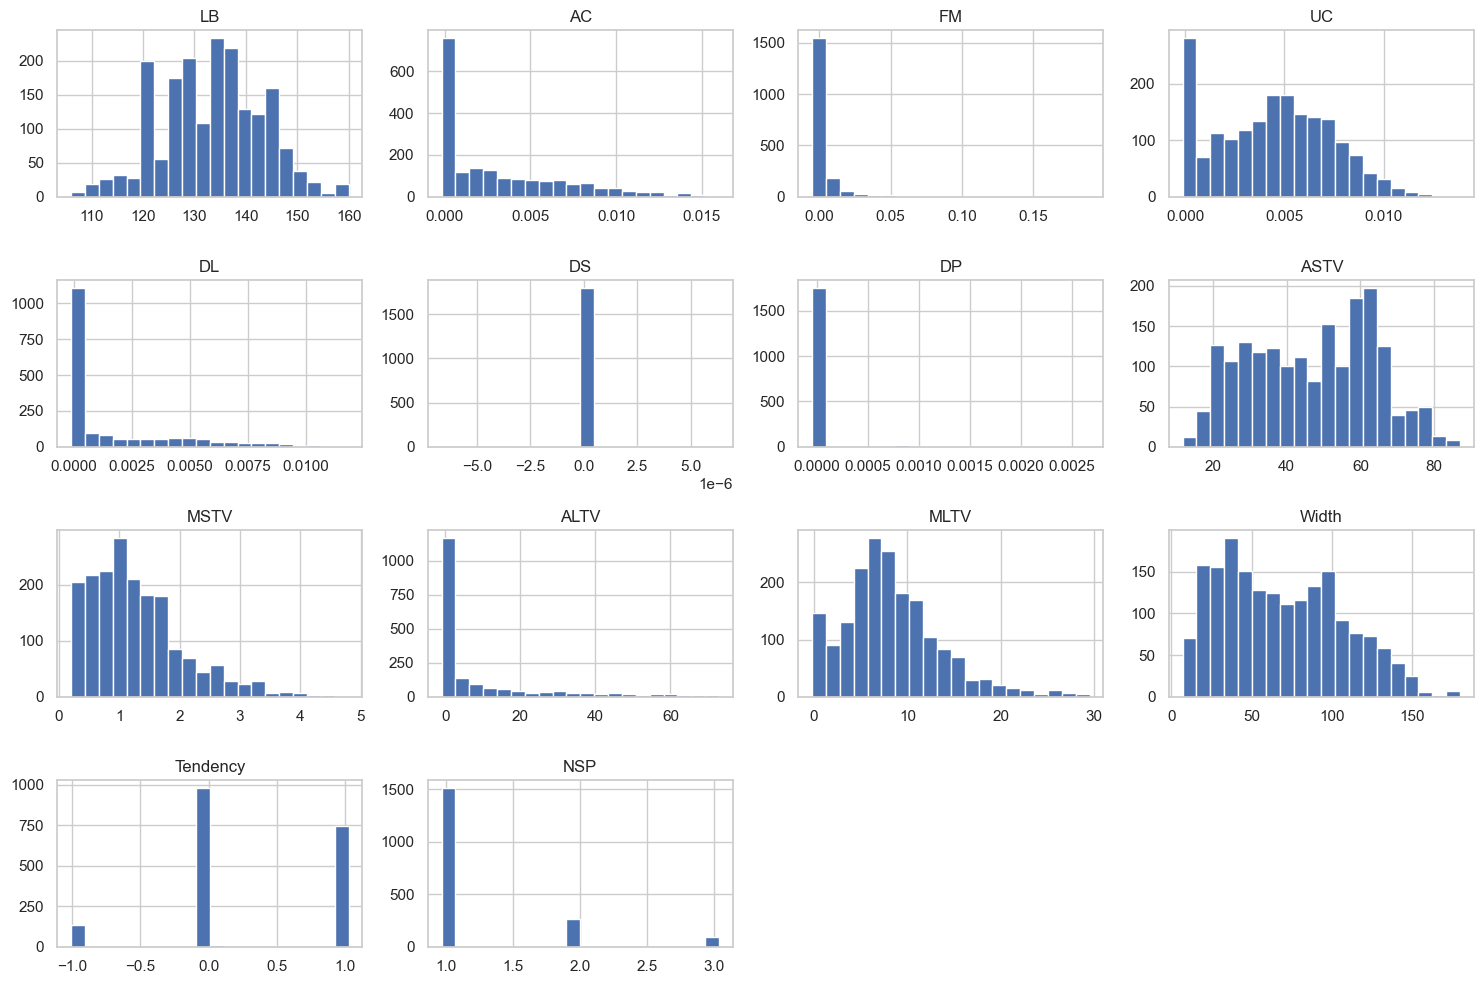

In [17]:
df_clean.hist(figsize=(15, 10), bins=20)
plt.tight_layout()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'LB'),
  Text(1, 0, 'AC'),
  Text(2, 0, 'FM'),
  Text(3, 0, 'UC'),
  Text(4, 0, 'DL'),
  Text(5, 0, 'DS'),
  Text(6, 0, 'DP'),
  Text(7, 0, 'ASTV'),
  Text(8, 0, 'MSTV'),
  Text(9, 0, 'ALTV'),
  Text(10, 0, 'MLTV'),
  Text(11, 0, 'Width'),
  Text(12, 0, 'Tendency'),
  Text(13, 0, 'NSP')])

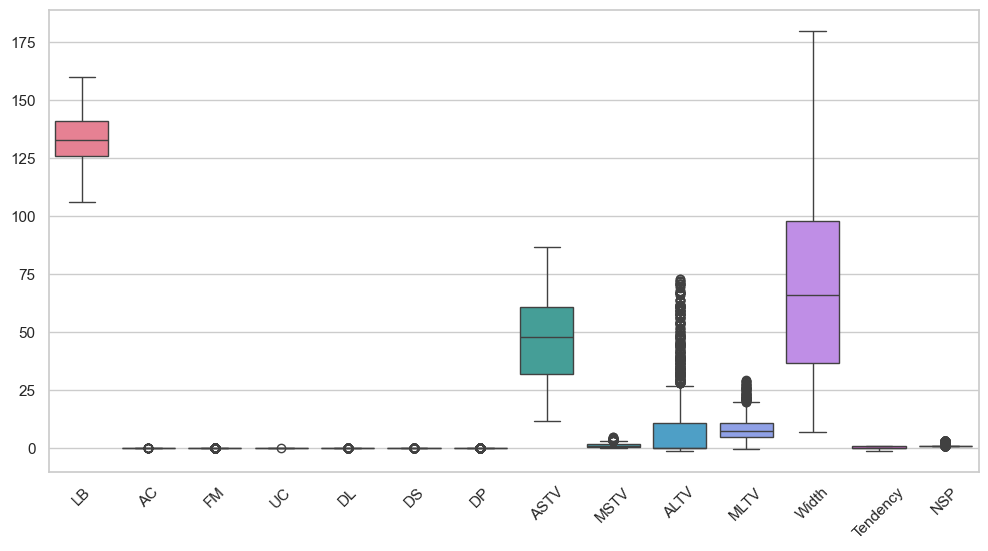

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean)
plt.xticks(rotation=45)

<Axes: >

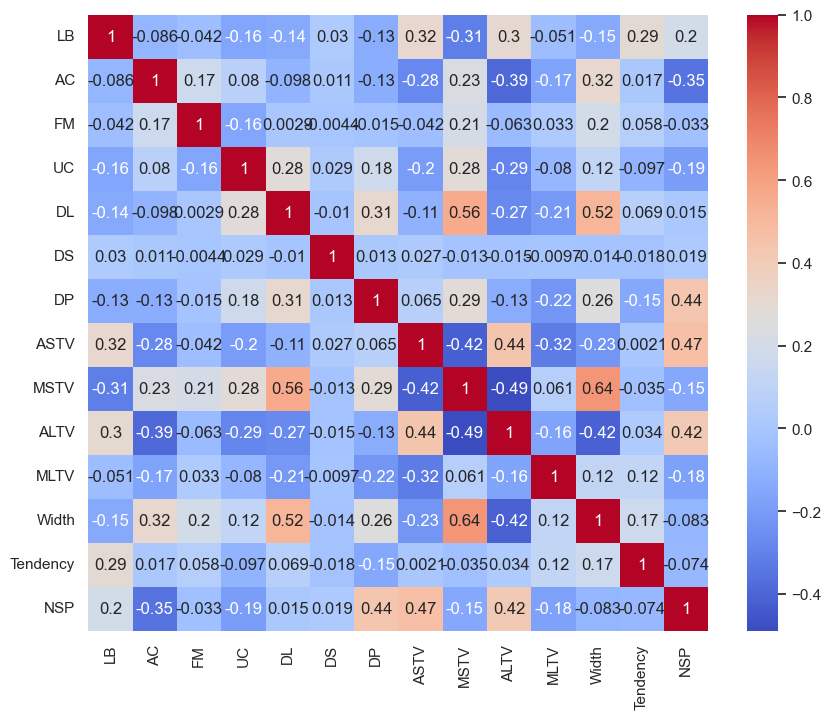

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm")

In [1]:
sns.pairplot(df_clean)
sns.violinplot(data=df_clean[['LB', 'AC', 'FM', 'UC']])

NameError: name 'sns' is not defined